In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Importing libries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as pyplot

In [12]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Feedforward Neural Network/loan.csv', encoding='latin-1')
data.head(5)

<ipython-input-12-29d6137dd4b1>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Feedforward Neural Network/loan.csv', encoding='latin-1')


,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,repay_fail
0,1,NaN,60 months,100.99,NaN,E,10+ years,MORTGAGE,NaN,Current,...,100.00,NaN,NaN,NaN,100.00%,NaN,NaN,NaN,NaN,0
1,2,0.0,36 months,0.00,0.00,A,< 1 year,RENT,0.0,Charged Off,...,0.00,0.0,0.0,0.0,0.00%,1.0,0.00,0.00,0.00,1
2,3,2500.0,36 months,13.98,85.42,C,4 years,RENT,20004.0,Does not meet the credit policy. Status:Fully ...,...,19.86,0.0,7.0,0.0,0.213,10.0,3075.29,2500.00,575.29,0
3,4,5000.0,36 months,15.95,175.67,D,4 years,RENT,59000.0,Charged Off,...,19.57,0.0,7.0,0.0,0.999,15.0,2948.76,1909.02,873.81,1
4,5,7000.0,36 months,9.91,225.58,B,10+ years,MORTGAGE,53796.0,Fully Paid,...,10.80,3.0,7.0,0.0,0.472,20.0,8082.39,7000.00,1082.39,0


In [14]:
# Basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       38480 non-null  int64  
 1   loan_amnt        38479 non-null  float64
 2   term             38480 non-null  object 
 3   int_rate         38480 non-null  float64
 4   installment      38479 non-null  float64
 5   grade            38480 non-null  object 
 6   emp_length       37487 non-null  object 
 7   home_ownership   38480 non-null  object 
 8   annual_inc       38478 non-null  float64
 9   loan_status      38480 non-null  object 
 10  purpose          38480 non-null  object 
 11  dti              38480 non-null  float64
 12  delinq_2yrs      38479 non-null  float64
 13  open_acc         38479 non-null  float64
 14  pub_rec          38479 non-null  float64
 15  revol_util       38421 non-null  object 
 16  total_acc        38479 non-null  float64
 17  total_pymnt_

In [15]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0           0
loan_amnt            1
term                 0
int_rate             0
installment          1
grade                0
emp_length         993
home_ownership       0
annual_inc           2
loan_status          0
purpose              0
dti                  0
delinq_2yrs          1
open_acc             1
pub_rec              1
revol_util          59
total_acc            1
total_pymnt_inv      1
total_rec_prncp      1
total_rec_int        1
repay_fail           0
dtype: int64


In [16]:
# Data Preprocessing
# Remove rows where emp_length contains '>', '<', or '+'
data = data[~data['emp_length'].astype(str).str.contains(r'[<>+]', na=False)]

# Save the cleaned dataset
data.to_csv("cleaned_dataset.csv", index=False)

print("Rows with '>', '<', or '+' in emp_length have been removed!")

Rows with '>', '<', or '+' in emp_length have been removed!


In [17]:
data.head(5)

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,repay_fail
2,3,2500.0,36 months,13.98,85.42,C,4 years,RENT,20004.0,Does not meet the credit policy. Status:Fully ...,...,19.86,0.0,7.0,0.0,0.213,10.0,3075.29,2500.00,575.29,0
3,4,5000.0,36 months,15.95,175.67,D,4 years,RENT,59000.0,Charged Off,...,19.57,0.0,7.0,0.0,0.999,15.0,2948.76,1909.02,873.81,1
7,8,8000.0,36 months,6.03,243.49,A,NaN,MORTGAGE,77736.0,Fully Paid,...,6.07,0.0,12.0,0.0,0.136,49.0,8724.97,8000.00,724.97,0
8,9,6000.0,36 months,7.49,186.61,A,3 years,RENT,35000.0,Fully Paid,...,13.13,0.0,5.0,0.0,0.477,9.0,6717.95,6000.00,717.95,0
9,10,25600.0,60 months,14.27,599.26,C,4 years,RENT,86000.0,Fully Paid,...,26.51,0.0,16.0,0.0,0.708,32.0,32659.13,25600.00,7240.06,0


In [18]:
# Extract numeric values and convert to integers
data['emp_length'] = data['emp_length'].astype(str).str.extract('(\d+)').astype(float)

# Save the cleaned dataset
data.to_csv("cleaned_dataset.csv", index=False)



emp_length converted to numerical format!


In [19]:
data.head(5)

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,repay_fail
2,3,2500.0,36 months,13.98,85.42,C,4.0,RENT,20004.0,Does not meet the credit policy. Status:Fully ...,...,19.86,0.0,7.0,0.0,0.213,10.0,3075.29,2500.00,575.29,0
3,4,5000.0,36 months,15.95,175.67,D,4.0,RENT,59000.0,Charged Off,...,19.57,0.0,7.0,0.0,0.999,15.0,2948.76,1909.02,873.81,1
7,8,8000.0,36 months,6.03,243.49,A,NaN,MORTGAGE,77736.0,Fully Paid,...,6.07,0.0,12.0,0.0,0.136,49.0,8724.97,8000.00,724.97,0
8,9,6000.0,36 months,7.49,186.61,A,3.0,RENT,35000.0,Fully Paid,...,13.13,0.0,5.0,0.0,0.477,9.0,6717.95,6000.00,717.95,0
9,10,25600.0,60 months,14.27,599.26,C,4.0,RENT,86000.0,Fully Paid,...,26.51,0.0,16.0,0.0,0.708,32.0,32659.13,25600.00,7240.06,0


In [20]:
# Convert 'term' to numerical (extract digits and convert to integer)
data['term'] = data['term'].astype(str).str.extract('(\d+)').astype(int)

# Save the cleaned dataset
data.to_csv("cleaned_dataset.csv", index=False)


In [22]:
data.head(10)

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,repay_fail
2,3,2500.0,36,13.98,85.42,C,4.0,RENT,20004.0,Does not meet the credit policy. Status:Fully ...,...,19.86,0.0,7.0,0.0,0.213,10.0,3075.29,2500.00,575.29,0
3,4,5000.0,36,15.95,175.67,D,4.0,RENT,59000.0,Charged Off,...,19.57,0.0,7.0,0.0,0.999,15.0,2948.76,1909.02,873.81,1
7,8,8000.0,36,6.03,243.49,A,NaN,MORTGAGE,77736.0,Fully Paid,...,6.07,0.0,12.0,0.0,0.136,49.0,8724.97,8000.00,724.97,0
8,9,6000.0,36,7.49,186.61,A,3.0,RENT,35000.0,Fully Paid,...,13.13,0.0,5.0,0.0,0.477,9.0,6717.95,6000.00,717.95,0
9,10,25600.0,60,14.27,599.26,C,4.0,RENT,86000.0,Fully Paid,...,26.51,0.0,16.0,0.0,0.708,32.0,32659.13,25600.00,7240.06,0
11,12,6250.0,36,17.27,223.68,D,4.0,MORTGAGE,28000.0,Charged Off,...,13.76,0.0,2.0,1.0,0.0846,15.0,6688.64,4764.18,1713.09,1
12,13,8000.0,36,13.79,272.61,C,5.0,RENT,75000.0,Fully Paid,...,12.78,0.0,8.0,0.0,0.619,37.0,9813.67,7999.97,1813.70,0
13,14,15000.0,36,15.23,521.68,C,7.0,MORTGAGE,38400.0,Fully Paid,...,17.38,1.0,5.0,0.0,0.817,12.0,18760.55,15000.00,3760.55,0
14,15,16000.0,36,6.54,101.97,A,4.0,MORTGAGE,100000.0,Fully Paid,...,6.05,0.0,5.0,0.0,0.651,36.0,3560.66,3325.00,346.07,0
15,16,7000.0,36,16.63,248.29,E,7.0,RENT,30996.0,Fully Paid,...,8.32,2.0,3.0,0.0,0.965,11.0,7811.26,7000.00,947.01,0


In [25]:
# Convert 'grade' to categorical
data['grade'] = data['grade'].astype('category')

# Save the cleaned dataset
data.to_csv("cleaned_dataset.csv", index=False)

data.head(10)

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,repay_fail
2,3,2500.0,36,13.98,85.42,C,4.0,RENT,20004.0,Does not meet the credit policy. Status:Fully ...,...,19.86,0.0,7.0,0.0,0.213,10.0,3075.29,2500.00,575.29,0
3,4,5000.0,36,15.95,175.67,D,4.0,RENT,59000.0,Charged Off,...,19.57,0.0,7.0,0.0,0.999,15.0,2948.76,1909.02,873.81,1
7,8,8000.0,36,6.03,243.49,A,NaN,MORTGAGE,77736.0,Fully Paid,...,6.07,0.0,12.0,0.0,0.136,49.0,8724.97,8000.00,724.97,0
8,9,6000.0,36,7.49,186.61,A,3.0,RENT,35000.0,Fully Paid,...,13.13,0.0,5.0,0.0,0.477,9.0,6717.95,6000.00,717.95,0
9,10,25600.0,60,14.27,599.26,C,4.0,RENT,86000.0,Fully Paid,...,26.51,0.0,16.0,0.0,0.708,32.0,32659.13,25600.00,7240.06,0
11,12,6250.0,36,17.27,223.68,D,4.0,MORTGAGE,28000.0,Charged Off,...,13.76,0.0,2.0,1.0,0.0846,15.0,6688.64,4764.18,1713.09,1
12,13,8000.0,36,13.79,272.61,C,5.0,RENT,75000.0,Fully Paid,...,12.78,0.0,8.0,0.0,0.619,37.0,9813.67,7999.97,1813.70,0
13,14,15000.0,36,15.23,521.68,C,7.0,MORTGAGE,38400.0,Fully Paid,...,17.38,1.0,5.0,0.0,0.817,12.0,18760.55,15000.00,3760.55,0
14,15,16000.0,36,6.54,101.97,A,4.0,MORTGAGE,100000.0,Fully Paid,...,6.05,0.0,5.0,0.0,0.651,36.0,3560.66,3325.00,346.07,0
15,16,7000.0,36,16.63,248.29,E,7.0,RENT,30996.0,Fully Paid,...,8.32,2.0,3.0,0.0,0.965,11.0,7811.26,7000.00,947.01,0


In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'grade' column
data['grade'] = label_encoder.fit_transform(data['grade'])

data.head(10)


,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,repay_fail
2,3,2500.0,36,13.98,85.42,2,4.0,RENT,20004.0,Does not meet the credit policy. Status:Fully ...,...,19.86,0.0,7.0,0.0,0.213,10.0,3075.29,2500.00,575.29,0
3,4,5000.0,36,15.95,175.67,3,4.0,RENT,59000.0,Charged Off,...,19.57,0.0,7.0,0.0,0.999,15.0,2948.76,1909.02,873.81,1
7,8,8000.0,36,6.03,243.49,0,NaN,MORTGAGE,77736.0,Fully Paid,...,6.07,0.0,12.0,0.0,0.136,49.0,8724.97,8000.00,724.97,0
8,9,6000.0,36,7.49,186.61,0,3.0,RENT,35000.0,Fully Paid,...,13.13,0.0,5.0,0.0,0.477,9.0,6717.95,6000.00,717.95,0
9,10,25600.0,60,14.27,599.26,2,4.0,RENT,86000.0,Fully Paid,...,26.51,0.0,16.0,0.0,0.708,32.0,32659.13,25600.00,7240.06,0
11,12,6250.0,36,17.27,223.68,3,4.0,MORTGAGE,28000.0,Charged Off,...,13.76,0.0,2.0,1.0,0.0846,15.0,6688.64,4764.18,1713.09,1
12,13,8000.0,36,13.79,272.61,2,5.0,RENT,75000.0,Fully Paid,...,12.78,0.0,8.0,0.0,0.619,37.0,9813.67,7999.97,1813.70,0
13,14,15000.0,36,15.23,521.68,2,7.0,MORTGAGE,38400.0,Fully Paid,...,17.38,1.0,5.0,0.0,0.817,12.0,18760.55,15000.00,3760.55,0
14,15,16000.0,36,6.54,101.97,0,4.0,MORTGAGE,100000.0,Fully Paid,...,6.05,0.0,5.0,0.0,0.651,36.0,3560.66,3325.00,346.07,0
15,16,7000.0,36,16.63,248.29,4,7.0,RENT,30996.0,Fully Paid,...,8.32,2.0,3.0,0.0,0.965,11.0,7811.26,7000.00,947.01,0


In [32]:
# Fit and transform the 'grade' column
data['home_ownership'] = label_encoder.fit_transform(data['home_ownership'])
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])
data.head(5)

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,repay_fail
2,3,2500.0,36,13.98,85.42,2,4.0,4,20004.0,4,...,19.86,0.0,7.0,0.0,0.213,10.0,3075.29,2500.00,575.29,0
3,4,5000.0,36,15.95,175.67,3,4.0,4,59000.0,0,...,19.57,0.0,7.0,0.0,0.999,15.0,2948.76,1909.02,873.81,1
7,8,8000.0,36,6.03,243.49,0,NaN,0,77736.0,5,...,6.07,0.0,12.0,0.0,0.136,49.0,8724.97,8000.00,724.97,0
8,9,6000.0,36,7.49,186.61,0,3.0,4,35000.0,5,...,13.13,0.0,5.0,0.0,0.477,9.0,6717.95,6000.00,717.95,0
9,10,25600.0,60,14.27,599.26,2,4.0,4,86000.0,5,...,26.51,0.0,16.0,0.0,0.708,32.0,32659.13,25600.00,7240.06,0


In [33]:
data['purpose'] = label_encoder.fit_transform(data['purpose'])
data.head(5)

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,repay_fail
2,3,2500.0,36,13.98,85.42,2,4.0,4,20004.0,4,...,19.86,0.0,7.0,0.0,0.213,10.0,3075.29,2500.00,575.29,0
3,4,5000.0,36,15.95,175.67,3,4.0,4,59000.0,0,...,19.57,0.0,7.0,0.0,0.999,15.0,2948.76,1909.02,873.81,1
7,8,8000.0,36,6.03,243.49,0,NaN,0,77736.0,5,...,6.07,0.0,12.0,0.0,0.136,49.0,8724.97,8000.00,724.97,0
8,9,6000.0,36,7.49,186.61,0,3.0,4,35000.0,5,...,13.13,0.0,5.0,0.0,0.477,9.0,6717.95,6000.00,717.95,0
9,10,25600.0,60,14.27,599.26,2,4.0,4,86000.0,5,...,26.51,0.0,16.0,0.0,0.708,32.0,32659.13,25600.00,7240.06,0


In [34]:
num_rows = data.shape[0]
print("Number of rows:", num_rows)

Number of rows: 25450


In [35]:
data['loan_amnt'] = data['loan_amnt'].fillna(data['loan_amnt'].mean())

In [36]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0           0
loan_amnt            0
term                 0
int_rate             0
installment          0
grade                0
emp_length         993
home_ownership       0
annual_inc           1
loan_status          0
purpose              0
dti                  0
delinq_2yrs          0
open_acc             0
pub_rec              0
revol_util          43
total_acc            0
total_pymnt_inv      0
total_rec_prncp      0
total_rec_int        0
repay_fail           0
dtype: int64


In [41]:
#data['revol_util'] = data['revol_util'].fillna(data['revol_util'].mean())
print(data['revol_util'].dtype)

# Convert 'revol_util' to numeric
data['revol_util'] = pd.to_numeric(data['revol_util'], errors='coerce')

# Check the new data type
print(data['revol_util'].dtype)

object
float64


In [45]:
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].mean())
data.head(5)

print(data['emp_length'].dtype)

data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mean())
data.head(5)

float64


,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int,repay_fail
2,3,2500.0,36,13.98,85.42,2,4.000000,4,20004.0,4,...,19.86,0.0,7.0,0.0,0.213,10.0,3075.29,2500.00,575.29,0
3,4,5000.0,36,15.95,175.67,3,4.000000,4,59000.0,0,...,19.57,0.0,7.0,0.0,0.999,15.0,2948.76,1909.02,873.81,1
7,8,8000.0,36,6.03,243.49,0,4.083412,0,77736.0,5,...,6.07,0.0,12.0,0.0,0.136,49.0,8724.97,8000.00,724.97,0
8,9,6000.0,36,7.49,186.61,0,3.000000,4,35000.0,5,...,13.13,0.0,5.0,0.0,0.477,9.0,6717.95,6000.00,717.95,0
9,10,25600.0,60,14.27,599.26,2,4.000000,4,86000.0,5,...,26.51,0.0,16.0,0.0,0.708,32.0,32659.13,25600.00,7240.06,0


In [50]:
df = data
df.head(10)
print(df.isnull().sum())
# Data set is Cleaned!
# Then we can build the FFNN Model

Unnamed: 0         0
loan_amnt          0
term               0
int_rate           0
installment        0
grade              0
emp_length         0
home_ownership     0
annual_inc         1
loan_status        0
purpose            0
dti                0
delinq_2yrs        0
open_acc           0
pub_rec            0
revol_util         0
total_acc          0
total_pymnt_inv    0
total_rec_prncp    0
total_rec_int      0
repay_fail         0
dtype: int64


In [51]:
# Get the number of columns
num_columns = df.shape[1]
print("Number of columns:", num_columns)

Number of columns: 21


In [54]:
# Import librires for Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [55]:
# Spliting data set
X = df.drop(columns=['repay_fail'])
y = df['repay_fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [65]:
# standardized features
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# Modelling Neural N[etwork
model = Sequential([
    Dense(16, activation = 'leaky_relu', input_shape = (X_train.shape[1],)), # first layer
    Dense(8, activation = 'leaky_relu'), # second layer
    Dense(1, activation = 'sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
# compile the model
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
# Train the model
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8318 - loss: nan - val_accuracy: 0.8576 - val_loss: nan
Epoch 2/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8466 - loss: nan - val_accuracy: 0.8576 - val_loss: nan
Epoch 3/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8458 - loss: nan - val_accuracy: 0.8576 - val_loss: nan
Epoch 4/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8464 - loss: nan - val_accuracy: 0.8576 - val_loss: nan
Epoch 5/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8493 - loss: nan - val_accuracy: 0.8576 - val_loss: nan
Epoch 6/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8510 - loss: nan - val_accuracy: 0.8576 - val_loss: nan
Epoch 7/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8452 - loss: nan - val_accuracy: 0.8576 - val_loss: nan
Epoch 8/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8485 - loss: nan - val_accuracy: 0.8576 - val_loss: nan
Epoch 9/10
509/509 ━━━━━

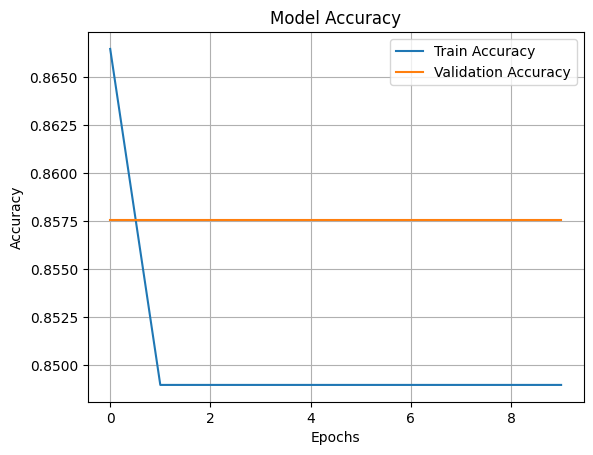

In [78]:
import matplotlib.pyplot as plt

#  Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()